In [110]:
from tensorflow.keras import layers, optimizers, losses, metrics, activations, regularizers, callbacks
from keras.models import Model
import numpy as np
import pandas as pd
import shap

In [111]:
path = "/global/D1/homes/jayao/XAI-Based-ECG-Diagnostics-main/data/"
x_all = np.load(path + 'x_all.npy')
x_train = np.load(path + 'x_train.npy')
y_train = np.load(path + 'y_train.npy', allow_pickle=True)
x_test  = np.load(path + 'x_test.npy')
y_test  = np.load(path + 'y_test.npy', allow_pickle=True)
print(x_train.shape)


x_all = x_all.transpose(0, 2, 1)    
print(x_all.shape)

x_train = x_train.transpose(0, 2, 1)            # transpose working correctly
x_test  = x_test.transpose(0, 2, 1)
print(x_train.shape)
x_train = x_train.reshape(17420, 12, 1000, 1)   # Add another channel
x_test  = x_test.reshape(4381, 12, 1000, 1)

print("x_train :", x_train.shape)
print("y_train :", y_train.shape)
print("x_test  :", x_test.shape)
print("y_test  :", y_test.shape)
print('Data loaded')

(17420, 1000, 12)
(21801, 12, 1000)
(17420, 12, 1000)
x_train : (17420, 12, 1000, 1)
y_train : (17420,)
x_test  : (4381, 12, 1000, 1)
y_test  : (4381,)
Data loaded


In [112]:
from sklearn.preprocessing import MultiLabelBinarizer


# Convert multi-label target labels to one-hot encoded matrix
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)
print("Classes:", mlb.classes_)

Classes: ['CD' 'HYP' 'MI' 'NORM' 'STTC']


In [113]:
print("x_train :", x_train.shape)
print("y_train :", y_train.shape)
print("x_test  :", x_test.shape)
print("y_test  :", y_test.shape)
print("x_all  :", x_all.shape)

x_train : (17420, 12, 1000, 1)
y_train : (17420, 5)
x_test  : (4381, 12, 1000, 1)
y_test  : (4381, 5)
x_all  : (21801, 12, 1000)


In [114]:

# Pull lead 2
x_test_new= x_test[:, 5]
print("x_test_new :", x_test_new.shape)
# Pull lead 2
x_train_new= x_train[:, 5]
print("x_train_new :", x_train_new.shape)
x_all_new= x_all[:, 5]
import numpy as np
x_all_new_reshaped = np.reshape(x_all_new, (21801, 1000, 1))

print("x_all_new_reshaped :", x_all_new_reshaped.shape)

x_test_new : (4381, 1000, 1)
x_train_new : (17420, 1000, 1)
x_all_new_reshaped : (21801, 1000, 1)


In [115]:
# Load and preprocess an example ECG signal for visualization
import wfdb
import numpy as np

def load_raw_data(filename, sampling_rate, path):
    if sampling_rate == 100:
        data, meta = wfdb.rdsamp(path + filename + "_lr")
    else:
        data, meta = wfdb.rdsamp(path + filename + "_hr")
    return data
# filename_to_load = "00262"  #  use this for lead 2
# filename_to_load = "01990"  #  use this for lead 7
filename_to_load = "03482"  #  use this for lead 3
sampling_rate = 100
path = "/global/D1/homes/jayao/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/ptbxl/records100/03000/"

input_example = load_raw_data(filename_to_load, sampling_rate, path)

### Load Model

In [116]:
from tensorflow.keras.models import load_model
model = load_model(r'/global/D1/homes/jayao/XAI-Based-ECG-Diagnostics-main/model/ST-CNN-5_lead3new.h5')

### Load example

In [117]:
import numpy as np
# Extracting values from the Lead 3
input_example = input_example[:, 2]
input_example.shape

(1000,)

## NEw LIME Trial

In [118]:
input_example = input_example.reshape(1, 1, 1000, 1)   # Add another channel

In [119]:
# Shape of input_example: (1, 1, 1000, 1)
# preprocessed_input = load_image(sys.argv[1])
# x = np.transpose(input_example, (1, 0))                 # transpose matrix
# x = np.expand_dims(x, axis=(0, -1))                # Add another channel on left and right

classes = ['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarcation', 'Normal ECG', 'ST/T change']

predictions = model.predict(input_example)


print("Sample belongs to following classes:")
for i in range(5):
    if predictions[0][i] >= 0.5 :
        print(" * " + classes[i])

1/1 [==============================] - 0s 176ms/step
Sample belongs to following classes:
 * Myocardial Infarcation


In [120]:
predictions

array([[0.2861353 , 0.09932449, 0.69811827, 0.12540047, 0.3011112 ]],
      dtype=float32)

In [121]:
# Import and call the analyze_prediction function
from lime_explanation import analyze_prediction

top_pred_classes, predicted_class = analyze_prediction(predictions, classes)

print("Top predicted classes:", top_pred_classes)
print("Predicted Class for the selected instance:", predicted_class)

Top predicted classes: [2 4 0 3 1]
Predicted Class for the selected instance: Myocardial Infarcation


In [122]:

import numpy as np
input_example2 = np.reshape(input_example, (1000, 1))
instance_ecg = input_example2[800:900]

In [123]:
# Generating Perturbations in the selected ECG Signal
from lime_explanation import segment_ecg_signal, generate_random_perturbations
from visualization import plot_segmented_ecg

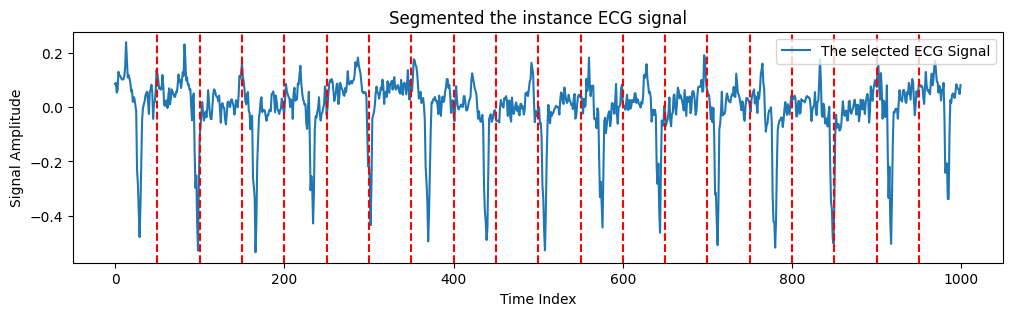

In [124]:
# Segmentation using the fixed number of slices
num_slices = 2 
slice_width = segment_ecg_signal(instance_ecg, num_slices)

# plot the segmented ECG signal
plot_segmented_ecg(input_example2, slice_width)

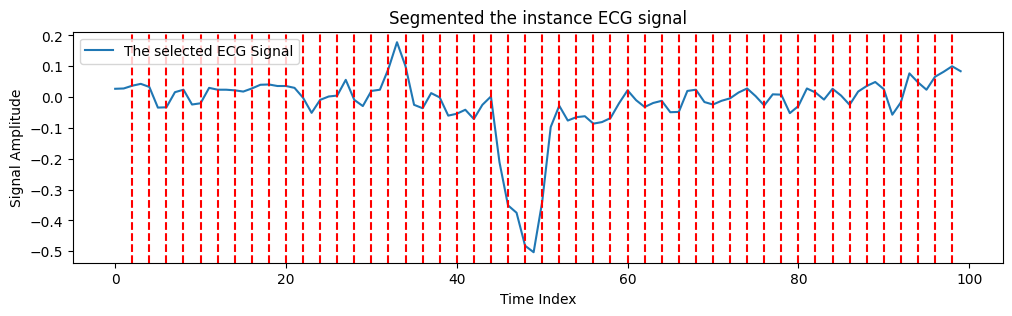

In [137]:
# Segmentation using the fixed number of slices
num_slices = 50 
slice_width = segment_ecg_signal(instance_ecg, num_slices)

# plot the segmented ECG signal
plot_segmented_ecg(instance_ecg, slice_width)

In [138]:
# Perturbation
num_perturbations = 150
random_perturbations = generate_random_perturbations(num_perturbations, num_slices)

# Example output
print("The shape of random_perturbations array (num_perturbations, num_slices):", random_perturbations.shape)
print("Example Perturbation:", random_perturbations[-1])

The shape of random_perturbations array (num_perturbations, num_slices): (150, 50)
Example Perturbation: [0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1
 1 1 1 1 0 0 0 1 1 0 1 0 0]


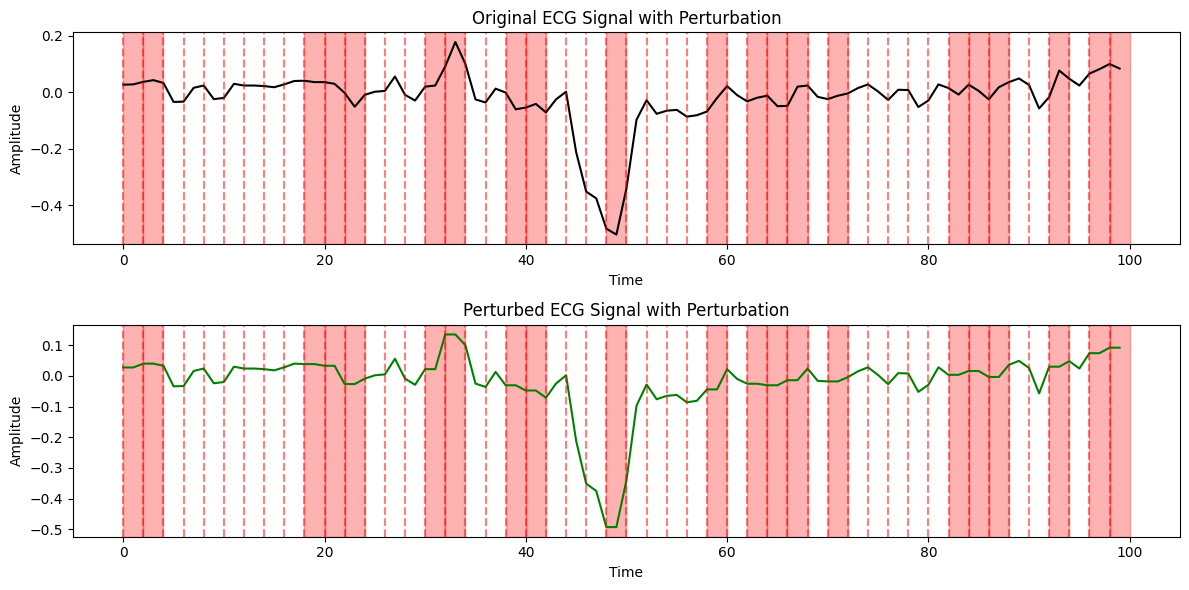

In [139]:
# Apply the Perturbation to the ECG signal and Display
from lime_explanation import apply_perturbation_to_ecg, perturb_mean
from visualization import plot_perturbed_ecg

# Choose the perturbation function
perturb_function = perturb_mean  

# Apply a random perturbation to the ECG signal
perturbed_ecg_example = apply_perturbation_to_ecg(instance_ecg, random_perturbations[-1], num_slices, perturb_function)

# plot the original and perturbed ECG signals with highlighted slices and deactivated segments
plot_perturbed_ecg(instance_ecg, perturbed_ecg_example, random_perturbations[-1], num_slices, title='ECG Signal with Perturbation')

In [140]:
from lime_explanation import predict_perturbations

## Predict the class probabilities using the trained ECG classifier
perturbation_predictions = predict_perturbations(model, instance_ecg, random_perturbations, num_slices, perturb_mean)

100
1/1 [==============================] - 0s 27ms/step


100
1/1 [==============================] - 0s 25ms/step
100
1/1 [==============================] - 0s 24ms/step
100
1/1 [==============================] - 0s 25ms/step
100
1/1 [==============================] - 0s 24ms/step
100
1/1 [==============================] - 0s 26ms/step
100
1/1 [==============================] - 0s 23ms/step
100
1/1 [==============================] - 0s 23ms/step
100
1/1 [==============================] - 0s 27ms/step
100
1/1 [==============================] - 0s 24ms/step
100
1/1 [==============================] - 0s 24ms/step
100
1/1 [==============================] - 0s 23ms/step
100
1/1 [==============================] - 0s 24ms/step
100
1/1 [==============================] - 0s 24ms/step
100
1/1 [==============================] - 0s 26ms/step
100
1/1 [==============================] - 0s 23ms/step
100
1/1 [==============================] - 0s 24ms/step
100
1/1 [==============================] - 0s 24ms/step
100
1/1 [==============================] - 0s 23

In [141]:
perturbation_predictions.shape

(150, 1, 5)

In [142]:
from lime_explanation import calculate_cosine_distances

# Calculate cosine distances between each perturbation and the original ECG signal representation
cosine_distances = calculate_cosine_distances(random_perturbations, num_slices)
print("Shape of Cosine Distances Array:", cosine_distances.shape)

Shape of Cosine Distances Array: (150,)


In [143]:
from lime_explanation import calculate_weights_from_distances

#Applying a Kernel Function to Compute Weights
kernel_width = 0.25  # This can be adjusted based on your specific needs
weights = calculate_weights_from_distances(cosine_distances, kernel_width)

# Now we have the weights for each perturbation for further analysis
print("Shape of Weights Array:", weights.shape)

Shape of Weights Array: (150,)


In [144]:

# Check the shape of perturbation predictions
print("Shape of perturbation_predictions:", perturbation_predictions.shape)

Shape of perturbation_predictions: (150, 1, 5)


In [145]:
# Constructing an Interpretable Linear Model for ECG Analysis
from lime_explanation import fit_explainable_model

# Constructing the Explainable Model for ECG Signals
segment_importance_coefficients = fit_explainable_model(perturbation_predictions, random_perturbations, weights, target_class=top_pred_classes[0])

# The importance coefficients for each segment
print("Segment Importance Coefficients:", segment_importance_coefficients.shape)

Segment Importance Coefficients: (50,)


In [146]:
# Extracting Insights from the Linear Model
# Isolating Influential Signal Segments
from lime_explanation import identify_top_influential_segments

number_of_top_features = 5
top_influential_segments = identify_top_influential_segments(segment_importance_coefficients, number_of_top_features)

# The indices of the top influential segments
print("Top Influential Signal Segments:", top_influential_segments)

Top Influential Signal Segments: [13 45 22 25 21]


Mean of empty slice.
invalid value encountered in double_scalars


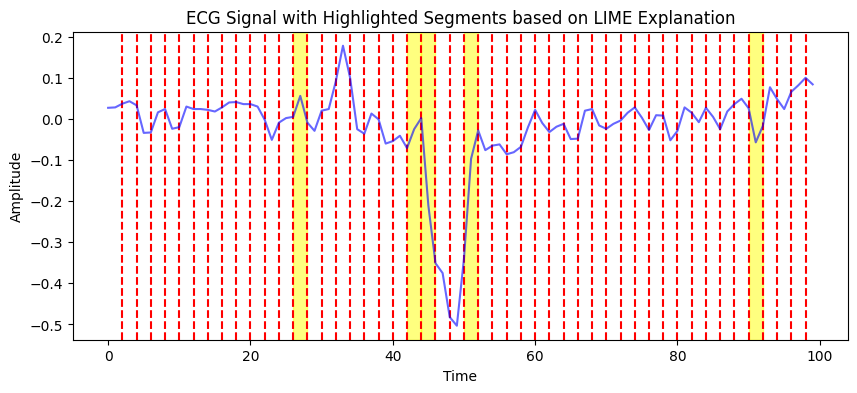

In [147]:
# Visualizing the LIME Explanation: Highlighting Key Segments
from visualization import visualize_lime_explanation

visualize_lime_explanation(instance_ecg, top_influential_segments, num_slices, perturb_function=perturb_mean)

## Heatmap test

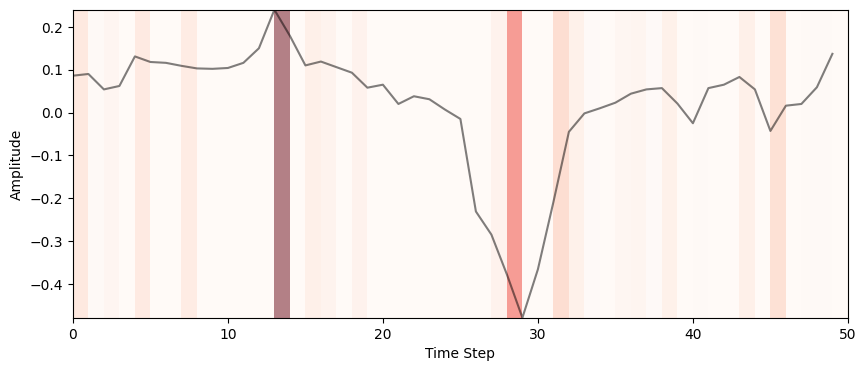

In [148]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming ecg_data is a 1D array of shape (1000,)
# and importance_coefficients is a 1D array of shape (100,)
ecg_data = input_example2[0:50]

# Define the range of data being plotted
start_index = 0
end_index = 50

# Reshape importance_coefficients to match the shape of ecg_data
importance_coefficients = segment_importance_coefficients.reshape((len(segment_importance_coefficients), 1))


# Multiply importance coefficients by each segment of the ECG data
heatmap = ecg_data[:len(importance_coefficients)] * importance_coefficients

# Create a time array for x-axis
time = np.arange(start_index, end_index)

# Plot the original ECG
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_data, color='black', alpha=0.5)

# Plot the heatmap overlay
plt.imshow(heatmap.T, cmap='Reds', aspect='auto', extent=[start_index, end_index, np.min(ecg_data), np.max(ecg_data)], alpha=0.5, vmin=0, vmax=np.max(heatmap))  # Adjust colormap and normalization range
# plt.colorbar(label='Importance')
# plt.imshow(heatmap.T, cmap='Reds', aspect='auto', alpha=0.5, extent=[0, len(ecg_data), np.min(ecg_data), np.max(ecg_data)])


plt.xlabel('Time Step')
plt.ylabel('Amplitude')
# plt.title('LIME Heatmap Overlay (Data from {} to {})'.format(start_index, end_index))

# Ensure the original ECG plot is visible
plt.show()


## Overlap Comparison with Pertuberations

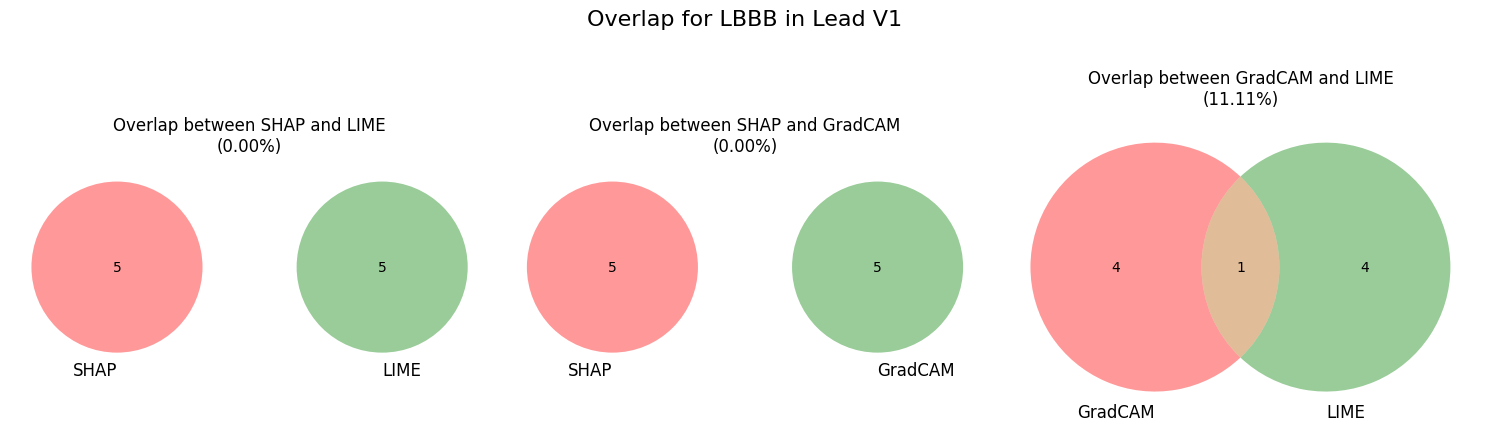

In [31]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3

# Assuming top_segments_X are lists containing the indices of the top segments identified by each XAI method Lead 7
top_segments_SHAP = [28, 25, 36,34, 35]  # Example indices
top_segments_Gradcam = [49, 17, 18, 48, 10]  # Example indices
top_segments_LIME = [15, 16, 18, 19, 20]  # Example indices


# Convert lists to sets
set_SHAP = set(top_segments_SHAP)
set_LIME = set(top_segments_LIME)
set_Gradcam = set(top_segments_Gradcam)

# Calculate intersection and union for pairs
intersection_SHAP_LIME = set_SHAP.intersection(set_LIME)
intersection_SHAP_Gradcam = set_SHAP.intersection(set_Gradcam)
intersection_Gradcam_LIME = set_Gradcam.intersection(set_LIME)

union_SHAP_LIME = set_SHAP.union(set_LIME)
union_SHAP_Gradcam = set_SHAP.union(set_Gradcam)
union_Gradcam_LIME = set_Gradcam.union(set_LIME)

# Calculate overlap percentage for pairs
overlap_percentage_SHAP_LIME = (len(intersection_SHAP_LIME) / len(union_SHAP_LIME)) * 100
overlap_percentage_SHAP_Gradcam = (len(intersection_SHAP_Gradcam) / len(union_SHAP_Gradcam)) * 100
overlap_percentage_Gradcam_LIME = (len(intersection_Gradcam_LIME) / len(union_Gradcam_LIME)) * 100

# Plot Venn diagrams
plt.figure(figsize=(15, 5))

# Subplot 1: SHAP vs LIME
plt.subplot(1, 3, 1)
venn2([set_SHAP, set_LIME], ('SHAP', 'LIME'))
plt.title("Overlap between SHAP and LIME\n(%.2f%%)" % overlap_percentage_SHAP_LIME)

# Subplot 2: SHAP vs GradCAM
plt.subplot(1, 3, 2)
venn2([set_SHAP, set_Gradcam], ('SHAP', 'GradCAM'))
plt.title("Overlap between SHAP and GradCAM\n(%.2f%%)" % overlap_percentage_SHAP_Gradcam)

# Subplot 3: GradCAM vs LIME
plt.subplot(1, 3, 3)
venn2([set_Gradcam, set_LIME], ('GradCAM', 'LIME'))
plt.title("Overlap between GradCAM and LIME\n(%.2f%%)" % overlap_percentage_Gradcam_LIME)

plt.suptitle("Overlap for LBBB in Lead V1", fontsize=16)
plt.tight_layout()
plt.show()

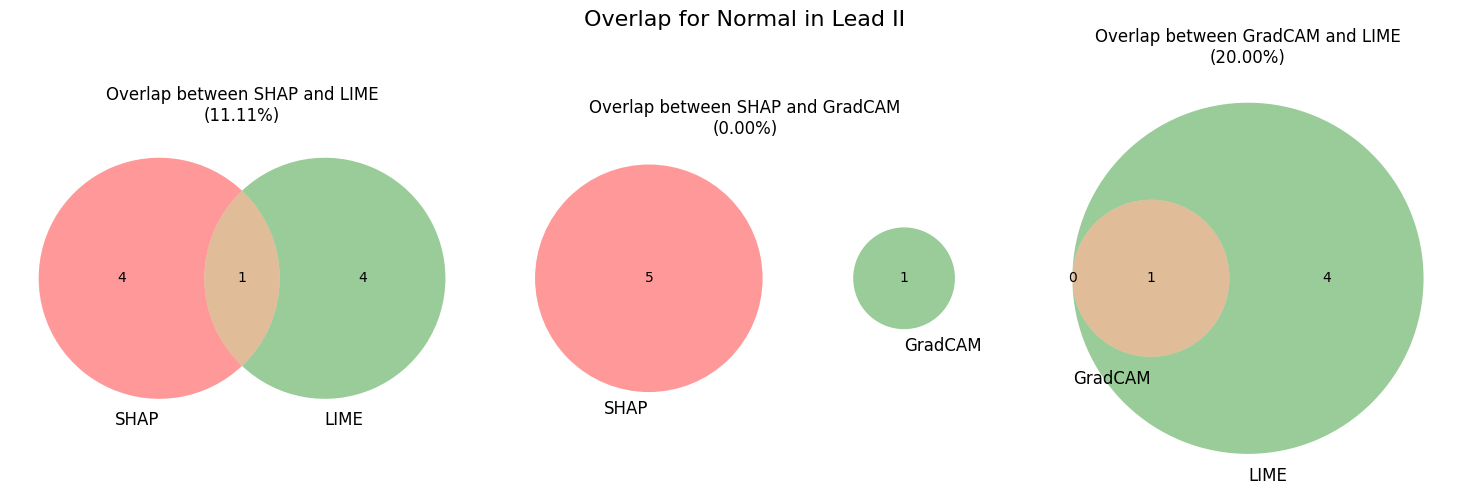

In [1]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3

# Assuming top_segments_X are lists containing the indices of the top segments identified by each XAI method Lead 2
top_segments_SHAP = [24, 2, 32, 36, 33]  # Example indices
top_segments_Gradcam = [27]  # Example indices
top_segments_LIME = [24,25,26,27,43]  # Example indices


# Convert lists to sets
set_SHAP = set(top_segments_SHAP)
set_LIME = set(top_segments_LIME)
set_Gradcam = set(top_segments_Gradcam)

# Calculate intersection and union for pairs
intersection_SHAP_LIME = set_SHAP.intersection(set_LIME)
intersection_SHAP_Gradcam = set_SHAP.intersection(set_Gradcam)
intersection_Gradcam_LIME = set_Gradcam.intersection(set_LIME)

union_SHAP_LIME = set_SHAP.union(set_LIME)
union_SHAP_Gradcam = set_SHAP.union(set_Gradcam)
union_Gradcam_LIME = set_Gradcam.union(set_LIME)

# Calculate overlap percentage for pairs
overlap_percentage_SHAP_LIME = (len(intersection_SHAP_LIME) / len(union_SHAP_LIME)) * 100
overlap_percentage_SHAP_Gradcam = (len(intersection_SHAP_Gradcam) / len(union_SHAP_Gradcam)) * 100
overlap_percentage_Gradcam_LIME = (len(intersection_Gradcam_LIME) / len(union_Gradcam_LIME)) * 100

# Plot Venn diagrams
plt.figure(figsize=(15, 5))

# Subplot 1: SHAP vs LIME
plt.subplot(1, 3, 1)
venn2([set_SHAP, set_LIME], ('SHAP', 'LIME'))
plt.title("Overlap between SHAP and LIME\n(%.2f%%)" % overlap_percentage_SHAP_LIME)

# Subplot 2: SHAP vs GradCAM
plt.subplot(1, 3, 2)
venn2([set_SHAP, set_Gradcam], ('SHAP', 'GradCAM'))
plt.title("Overlap between SHAP and GradCAM\n(%.2f%%)" % overlap_percentage_SHAP_Gradcam)

# Subplot 3: GradCAM vs LIME
plt.subplot(1, 3, 3)
venn2([set_Gradcam, set_LIME], ('GradCAM', 'LIME'))
plt.title("Overlap between GradCAM and LIME\n(%.2f%%)" % overlap_percentage_Gradcam_LIME)

plt.suptitle("Overlap for Normal in Lead II", fontsize=16)
plt.tight_layout()
plt.show()

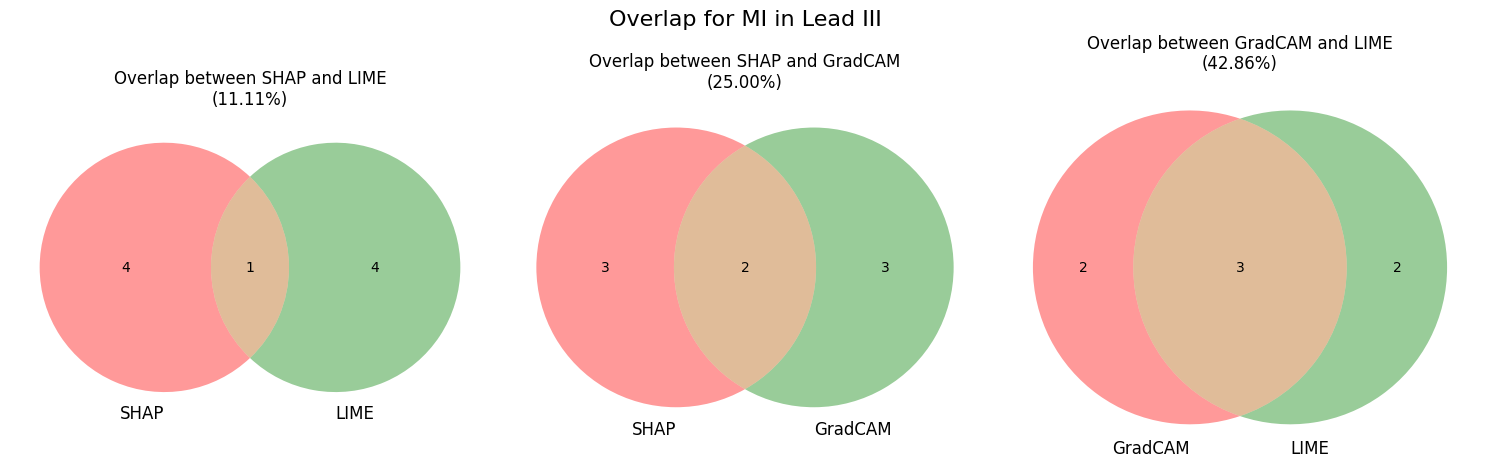

In [35]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3

# Assuming top_segments_X are lists containing the indices of the top segments identified by each XAI method Lead 3
top_segments_SHAP = [ 9, 44, 48, 14, 13]  # Example indices
top_segments_Gradcam = [9, 10, 11, 12, 13]  # Example indices
top_segments_LIME = [ 6, 15 ,13, 12 ,10]  # Example indices


# Convert lists to sets
set_SHAP = set(top_segments_SHAP)
set_LIME = set(top_segments_LIME)
set_Gradcam = set(top_segments_Gradcam)

# Calculate intersection and union for pairs
intersection_SHAP_LIME = set_SHAP.intersection(set_LIME)
intersection_SHAP_Gradcam = set_SHAP.intersection(set_Gradcam)
intersection_Gradcam_LIME = set_Gradcam.intersection(set_LIME)

union_SHAP_LIME = set_SHAP.union(set_LIME)
union_SHAP_Gradcam = set_SHAP.union(set_Gradcam)
union_Gradcam_LIME = set_Gradcam.union(set_LIME)

# Calculate overlap percentage for pairs
overlap_percentage_SHAP_LIME = (len(intersection_SHAP_LIME) / len(union_SHAP_LIME)) * 100
overlap_percentage_SHAP_Gradcam = (len(intersection_SHAP_Gradcam) / len(union_SHAP_Gradcam)) * 100
overlap_percentage_Gradcam_LIME = (len(intersection_Gradcam_LIME) / len(union_Gradcam_LIME)) * 100

# Plot Venn diagrams
plt.figure(figsize=(15, 5))

# Subplot 1: SHAP vs LIME
plt.subplot(1, 3, 1)
venn2([set_SHAP, set_LIME], ('SHAP', 'LIME'))
plt.title("Overlap between SHAP and LIME\n(%.2f%%)" % overlap_percentage_SHAP_LIME)

# Subplot 2: SHAP vs GradCAM
plt.subplot(1, 3, 2)
venn2([set_SHAP, set_Gradcam], ('SHAP', 'GradCAM'))
plt.title("Overlap between SHAP and GradCAM\n(%.2f%%)" % overlap_percentage_SHAP_Gradcam)

# Subplot 3: GradCAM vs LIME
plt.subplot(1, 3, 3)
venn2([set_Gradcam, set_LIME], ('GradCAM', 'LIME'))
plt.title("Overlap between GradCAM and LIME\n(%.2f%%)" % overlap_percentage_Gradcam_LIME)

plt.suptitle("Overlap for MI in Lead III", fontsize=16)
plt.tight_layout()
plt.show()

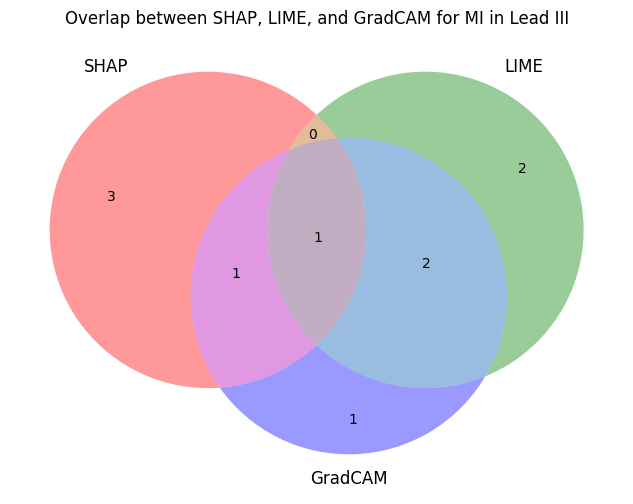

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Assuming top_segments_X are lists containing the indices of the top segments identified by each XAI method Lead 3
top_segments_SHAP = { 9, 44, 48, 14, 13}  # Example indices
top_segments_Gradcam = {9, 10, 11, 12, 13}  # Example indices
top_segments_LIME = { 6, 15 ,13, 12 ,10}  # Example indices

# Create Venn diagram
plt.figure(figsize=(8, 6))
venn = venn3([top_segments_SHAP, top_segments_LIME, top_segments_Gradcam], ('SHAP', 'LIME', 'GradCAM'))

# Set title
plt.title('Overlap between SHAP, LIME, and GradCAM for MI in Lead III')

# Show plot
plt.show()

## Jaccard similarity test

In [7]:
from sklearn.metrics import jaccard_score

# Example predictions for each XAI method and diagnosis
predictions = {
    'SHAP': {
        'Normal': [24, 2, 32, 36, 33],  # Example predictions for Normal diagnosis using SHAP
        'LBBB': [28, 25, 36, 34, 35],    # Example predictions for LBBB diagnosis using SHAP
        'MI': [9, 44, 48, 14, 13]   # Example predictions for MI diagnosis using SHAP
    },
    'GradCAM': {
        # 'Normal': [27, 0, 0, 0, 0],   # Example predictions for Normal diagnosis using GradCAM
        'Normal': [27],   # Example predictions for Normal diagnosis using GradCAM
        'LBBB': [49, 17, 18, 48, 10],    # Example predictions for LBBB diagnosis using GradCAM
        'MI': [9, 10, 11, 12, 13]   # Example predictions for MI diagnosis using GradCAM
    },
    'LIME': {
        'Normal': [24, 25, 26, 27, 43],  # Example predictions for Normal diagnosis using LIME
        'LBBB': [15, 16, 18, 19, 20],     # Example predictions for LBBB diagnosis using LIME
        'MI': [6, 15, 13, 12, 10]   # Example predictions for MI diagnosis using LIME
    }
}
# Compute Jaccard similarity coefficient for each pair of XAI methods and diagnosis
jaccard_similarity = {}
for xai_method1 in predictions.keys():
    for xai_method2 in predictions.keys():
        if xai_method1 != xai_method2:
            jaccard_similarity[(xai_method1, xai_method2)] = {}
            for diagnosis in predictions[xai_method1].keys():
                prediction1 = predictions[xai_method1][diagnosis] + [0] * (5 - len(predictions[xai_method1][diagnosis]))
                prediction2 = predictions[xai_method2][diagnosis] + [0] * (5 - len(predictions[xai_method2][diagnosis]))
                jaccard_similarity[(xai_method1, xai_method2)][diagnosis] = jaccard_score(prediction1, prediction2, average='macro')


# Print Jaccard similarity coefficient for each pair of XAI methods and diagnosis
for pair, similarity_scores in jaccard_similarity.items():
    print(f"{pair[0]} vs {pair[1]}:")
    for diagnosis, similarity in similarity_scores.items():
        print(f"  {diagnosis}: {similarity}")


SHAP vs GradCAM:
  Normal: 0.0
  LBBB: 0.0
  MI: 0.25
SHAP vs LIME:
  Normal: 0.1111111111111111
  LBBB: 0.0
  MI: 0.0
GradCAM vs SHAP:
  Normal: 0.0
  LBBB: 0.0
  MI: 0.25
GradCAM vs LIME:
  Normal: 0.0
  LBBB: 0.1111111111111111
  MI: 0.14285714285714285
LIME vs SHAP:
  Normal: 0.1111111111111111
  LBBB: 0.0
  MI: 0.0
LIME vs GradCAM:
  Normal: 0.0
  LBBB: 0.1111111111111111
  MI: 0.14285714285714285


##Old with pertrubed

Mean of empty slice.
invalid value encountered in double_scalars


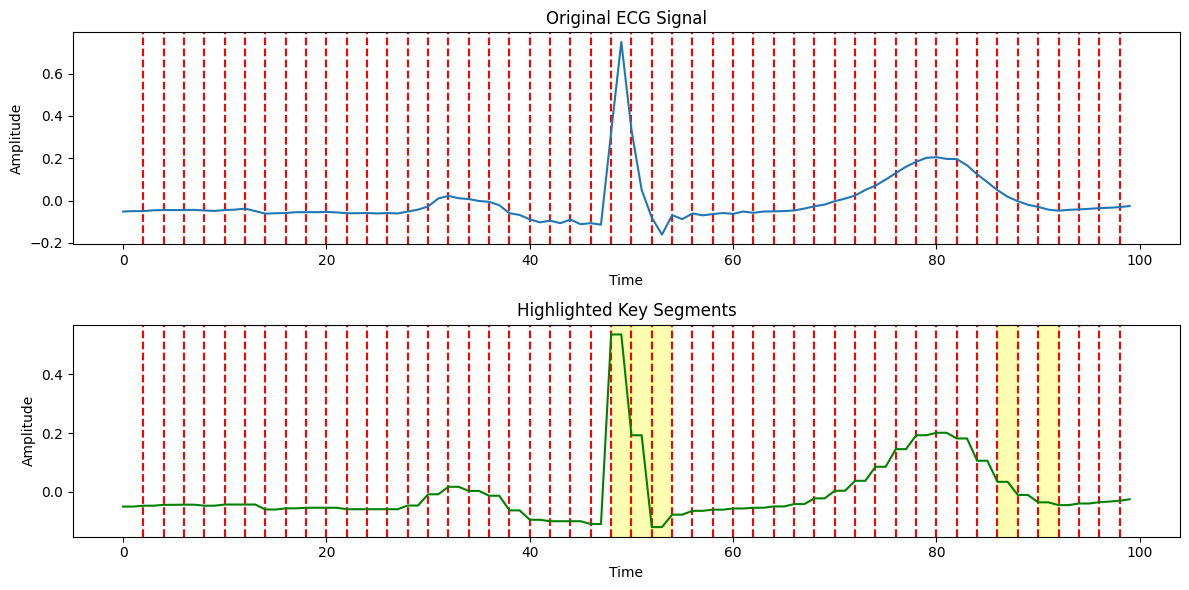

In [31]:
# Visualizing the LIME Explanation: Highlighting Key Segments
from visualization import visualize_lime_explanation

visualize_lime_explanation(instance_ecg, top_influential_segments, num_slices, perturb_function=perturb_mean)

## Old LIME

In [ ]:
import lime
from lime import lime_tabular
import tensorflow as tf

# explainer = lime_tabular.RecurrentTabularExplainer(x_test_new[:-6],training_labels=tf.keras.utils.to_categorical(y_test[:-6])
explainer = lime_tabular.RecurrentTabularExplainer(x_all_new_reshaped[:],training_labels=tf.keras.utils.to_categorical(y_train[:])
                                                   , feature_names=["Lead-II"]
                                                   , discretize_continuous=False
                                                   , feature_selection='auto'
                                                   , class_names=['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarcation', 'Normal ECG', 'ST/T change'])

In [ ]:
def average_and_rebin(array, bin_size):
    new_arr =[]
    temp_len = int(len(array)/bin_size)
    for i in range(temp_len):
        bin = []
        for j in range(bin_size):
            bin_val = array[j + (i*bin_size)]
            bin.append(bin_val)
        new_arr.append(np.repeat(np.mean(bin),bin_size))
    return np.asarray(new_arr).ravel()

j shape (1000, 1)
predicted labels (['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarcation', 'Normal ECG', 'ST/T change'])
157/157 [==============================] - 1s 7ms/step



                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    


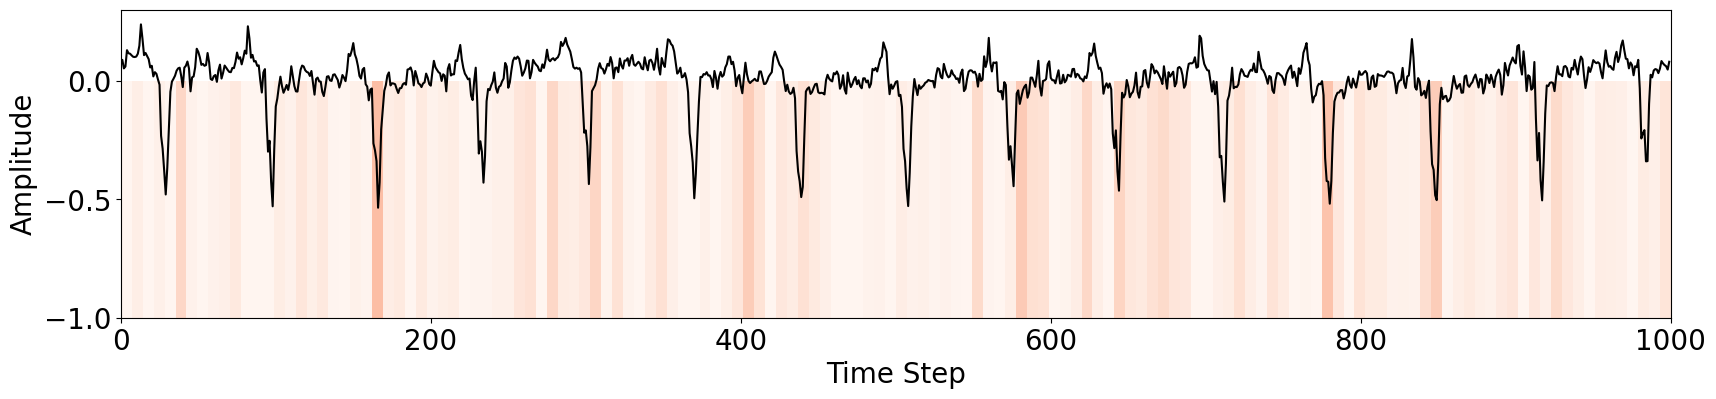

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

j = input_example2
print(f"j shape {j.shape}")

print("predicted labels (['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarcation', 'Normal ECG', 'ST/T change'])")

# Reshape input to match expected shape (1, 1, 1000, 1)
# j_reshaped = np.expand_dims(j, axis=0)
# print(f"j_reshaped {j_reshaped.shape}")
# predicted_labels = model.predict(j_reshaped)
# print("Predicted Labels:", predicted_labels)

# Explain instance
exp = explainer.explain_instance(j, model.predict, num_features=1000*1)
explanations = exp.as_list()
heatmap = np.zeros([1, 1000])

# Update heatmap based on Lime explanations
for k in explanations:
    if k[0].split("_")[0] == 'Lead-II':
        heatmap[0][int(k[0].split("-")[-1])] = k[1]

# Apply transformations to heatmap
test_heatmap = heatmap.copy()
test_heatmap[np.where(heatmap > 0)] = 0.0
test_heatmap = abs(test_heatmap)

leads = ["Lead-II"]
plt.figure(figsize=(20, 4))

for l in range(len(leads)):  # Iterate over the length of leads
    plt.imshow(np.expand_dims(average_and_rebin(test_heatmap[l], 7), axis=0), cmap='Reds', aspect="auto",
               interpolation='nearest', extent=[0, len(j), round(j[:, l].min()*1.05), round(j[:, l].max()*1.05)],
               vmin=test_heatmap.min(), vmax=test_heatmap.max(), alpha=1.0)

    plt.plot(j[:, l], 'k')

    plt.xlabel('Time Step')
    plt.ylabel('Amplitude')

plt.rc('font', size=20)
plt.show()


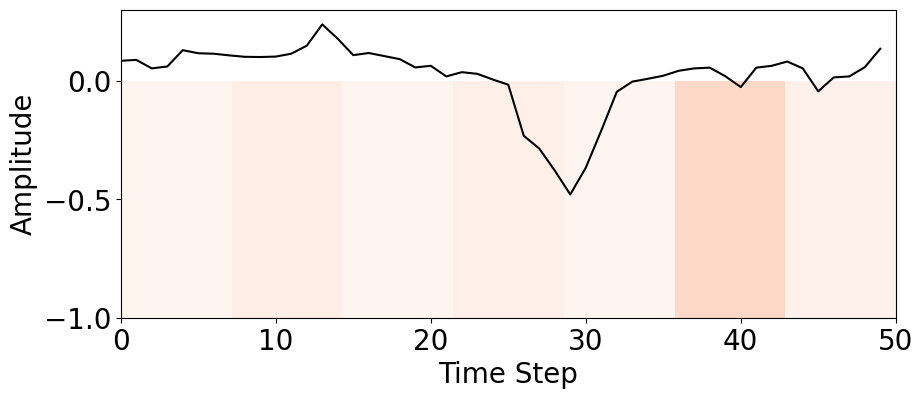

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range you want to plot
start_index = 350
end_index = 400

# Update heatmap based on Lime explanations
# Assuming your heatmap is already generated as per your previous code

leads = ["Lead-II"]
plt.figure(figsize=(10, 4))

for l in range(len(leads)):  # Iterate over the length of leads
    plt.imshow(np.expand_dims(average_and_rebin(test_heatmap[l, start_index:end_index], 7), axis=0), cmap='Reds', aspect="auto",
               interpolation='nearest', extent=[start_index, end_index, round(j[start_index:end_index, l].min()*1.05), round(j[start_index:end_index, l].max()*1.05)],
               vmin=test_heatmap.min(), vmax=test_heatmap.max(), alpha=1.0)

    plt.plot(range(start_index, end_index), j[start_index:end_index, l], 'k')

    plt.xlabel('Time Step')
    plt.ylabel('Amplitude')

plt.rc('font', size=20)
plt.show()


j shape (1000, 1)
predicted labels (['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarcation', 'Normal ECG', 'ST/T change'])
1/1 [==============================] - 0s 25ms/step
[0.28324008 0.20896743 0.7007792  0.03365058 0.46763474]
-----------------------
157/157 [==============================] - 1s 6ms/step



                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    


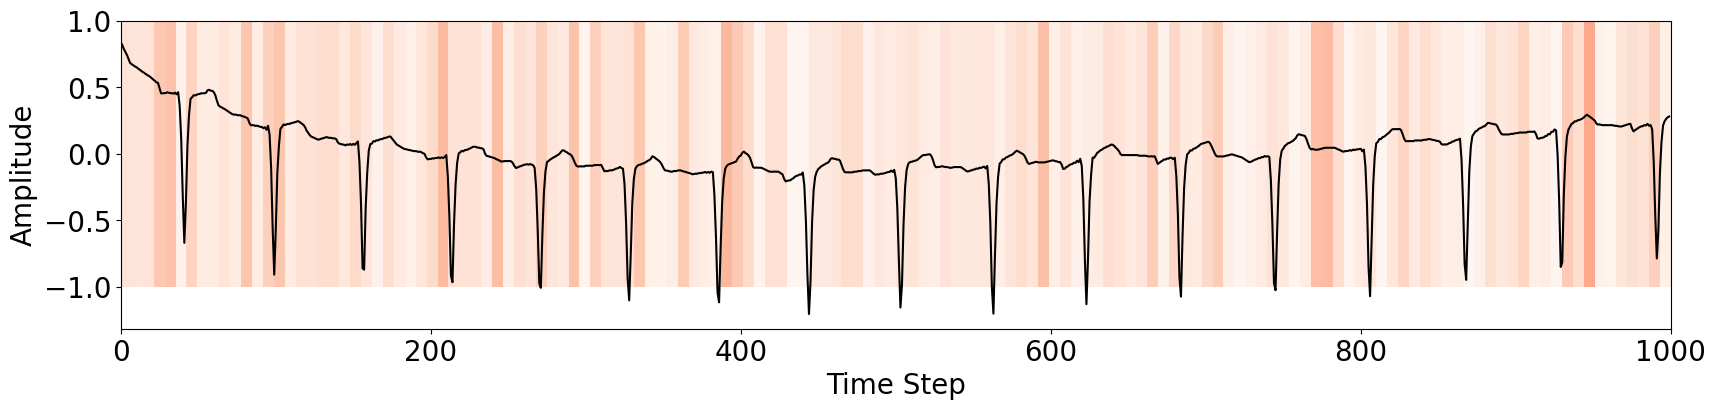

In [42]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming x_test_new has shape (6, 1000, 1)
# i = 262  # Index of the sample you want to plot (remember Python indexing starts from 0)
# j = x_all_new_reshaped[i]
# print(f"j shape {j.shape}")

# print("predicted labels (['Conduction Disturbance', 'Hypertrophy', 'Myocardial Infarcation', 'Normal ECG', 'ST/T change'])")

# # Reshape input to match expected shape (1, 1, 1000, 1)
# j_reshaped = np.expand_dims(np.expand_dims(j, axis=0), axis=0)
# print(model.predict(j_reshaped)[0])
# print("-----------------------")

# # Explain instance
# exp = explainer.explain_instance(j, model.predict, num_features=1000*1)
# explanations = exp.as_list()
# heatmap = np.zeros([1, 1000])

# # Update heatmap based on Lime explanations
# for k in explanations:
#     if k[0].split("_")[0] == 'Lead-II':
#         heatmap[0][int(k[0].split("-")[-1])] = k[1]

# # Apply transformations to heatmap
# test_heatmap = heatmap.copy()
# test_heatmap[np.where(heatmap > 0)] = 0.0
# test_heatmap = abs(test_heatmap)

# leads = ["Lead-II"]
# plt.figure(figsize=(20, 4))

# for l in range(len(leads)):  # Iterate over the length of leads
#     plt.imshow(np.expand_dims(average_and_rebin(test_heatmap[l], 7), axis=0), cmap='Reds', aspect="auto",
#                interpolation='nearest', extent=[0, len(j), round(j[:, l].min()*1.05), round(j[:, l].max()*1.05)],
#                vmin=test_heatmap.min(), vmax=test_heatmap.max(), alpha=1.0)

#     plt.plot(j[:, l], 'k')

#     plt.xlabel('Time Step')
#     plt.ylabel('Amplitude')
# # plt.colorbar()
# # plt.suptitle("ECG_{}".format(i))
# plt.rc('font', size=20)
# plt.show()
